# Arquivo JSON

## Inicialmente, abri o arquivo para perceber quais tipos de informações ele continha. Percebi que ele estava humanamente ilegivel e precisava de um tratamento para ficar com o formato legível de que arquivos JSON comumente apresentam. Através de uma ferramenta simples do Python, fiz a conversão do arquivo, possibilitando ler o arquivo.

### $ cat receitas.json | python -m json.tool > receitas_pretty.json

## Assim, foi possível perceber que o arquivo se tratava de um dicionário de receitas, contendo informações como o passo-a-passo para fazer o prato, ingredientes, informações nutricionais, nome da receita e a nota dada pelos usuários do site (www.epicurious.com)

## A partir de observações nos primeiros exemplos, pude perceber que a estrutura de cada elemento, continha as seguintes informações:

1. Directions: uma [lista] de passos a serem seguidos para elaborar o prato;
2. Fat: um float com a quantidade de gordura do prato;
3. Date: uma string contendo a data em que a receita foi divulgada (aparentemente, mas é possível que seja outra coisa);
4. Categories: [lista] de categorias às quais o prato pertence;
5. Calories: float com o número de calorias;
6. Desc: string com uma breve descrição do prato ou uma informação relacionada a ele;
7. Protein: float contendo a quantidade de proteínas presentes;
8. Rating: float contendo a nota do prato (imagino que dada pelos usuários do site);
9. Title: string contendo o nome do prato;
10. Ingredients: [lista] contendo os ingredientes utilizados na receita;
11. Sodium: float com a quantidade de sal presente no prato.

## Depois de entender as informações fornecidas, decidi prosseguir realizando um parse das informações, gerando um Numpy array contendo somente as informações úteis para os objetivos finais do desafio.

In [1]:
import numpy as np
import pandas as pd
import json
from collections import OrderedDict, Counter
import matplotlib.pyplot as plt
from datetime import datetime
# from IPython.display import display, HTML

receitas_path = 'receitas.json'

def parse(file_path):
    with open(file_path, 'r') as f:
        opt = json.load(f, object_pairs_hook=OrderedDict)
        
    return opt

opt = parse(receitas_path)

data = np.asarray(opt, dtype='object')
receitas_np = np.empty((len(data), 9), dtype='object')
wanted_keys = ['title', 'categories', 'calories', 'ingredients', 'date', 'fat', 'protein', 'sodium', 'rating']
for i in range(len(data)):
    for key in data[i].keys():
        if key in wanted_keys:
            if key == 'title':
                receitas_np[i, 0] = data[i][key]
            elif key == 'categories':
                receitas_np[i, 1] = data[i][key]
            elif key == 'ingredients':
                receitas_np[i, 2] = data[i][key]
            elif key == 'date':
                receitas_np[i, 3] = data[i][key][:10]
            elif key == 'calories':
                receitas_np[i, 4] = data[i][key]             
            elif key == 'fat':
                receitas_np[i, 5] = data[i][key]            
            elif key == 'protein':
                receitas_np[i, 6] = data[i][key]
            elif key == 'sodium':
                receitas_np[i, 7] = data[i][key]
            elif key == 'rating':
                receitas_np[i, 8] = data[i][key]
rows_none, _ = np.where(receitas_np == None)
receitas_np = np.delete(receitas_np, rows_none, 0)

df = pd.DataFrame(receitas_np).rename(columns={
    0: 'title',
    1: 'categories',
    2: 'ingredients',
    3: 'date',
    4: 'calories',
    5: 'fat',
    6: 'protein',
    7: 'sodium',
    8: 'rating'
}).drop_duplicates(subset='title')

df

,title,categories,ingredients,date,calories,fat,protein,sodium,rating
0,"Lentil, Apple, and Turkey Wrap","[Sandwich, Bean, Fruit, Tomato, turkey, Vegeta...","[4 cups low-sodium vegetable or chicken stock,...",2006-09-01,426,7,30,559,2.5
1,Boudin Blanc Terrine with Red Onion Confit,"[Food Processor, Onion, Pork, Bake, Bastille D...","[1 1/2 cups whipping cream, 2 medium onions, c...",2004-08-20,403,23,18,1439,4.375
2,Potato and Fennel Soup Hodge,"[Soup/Stew, Dairy, Potato, Vegetable, Fennel, ...","[1 fennel bulb (sometimes called anise), stalk...",2004-08-20,165,7,6,165,3.75
3,Spinach Noodle Casserole,"[Cheese, Dairy, Pasta, Vegetable, Side, Bake, ...","[1 12-ounce package frozen spinach soufflé, th...",2004-08-20,547,32,20,452,3.125
4,The Best Blts,"[Sandwich, Food Processor, Tomato, Kid-Friendl...",[2 1/2 cups (lightly packed) fresh basil leave...,2004-08-20,948,79,19,1042,4.375
5,Korean Marinated Beef,"[Beef, Ginger, Sauté, Stir-Fry, Quick & Easy, ...","[1/4 cup soy sauce, 1 tablespoon sugar, 2 teas...",2004-08-20,170,10,7,1272,4.375
6,Ham Persillade with Mustard Potato Salad and M...,"[Salad, Mustard, Potato, Picnic, Lunch, Mayonn...","[6 long parsley sprigs, divided, 1 3/4 cups re...",2008-10-23,602,41,23,1696,3.75
7,"Yams Braised with Cream, Rosemary and Nutmeg","[Milk/Cream, Dairy, Side, Thanksgiving, Rosema...","[4 teaspoons olive oil, 1/2 cup finely chopped...",2004-08-20,256,5,4,30,3.75
8,Banana-Chocolate Chip Cake With Peanut Butter ...,"[Cake, Chocolate, Fruit, Dessert, Bake, Kid-Fr...","[Nonstick vegetable oil spray, 3 cups all-purp...",2012-09-18,766,48,12,439,4.375
9,Beef Tenderloin with Garlic and Brandy,"[Garlic, Sauté, Low Carb, Quick & Easy, Wheat/...",[4 6- to 7-ounce beef tenderloin steaks (each ...,2004-08-20,174,12,11,176,4.375


## Com a tabela gerada através do Pandas, podemos observar inicialmente a disposição dos dados. Infelizmente, datasets comumente trazem diversos problemas como missing values, valores duplicados e outliers. Vamos observar estes dados mais profundamente através de gráficos e esta mesma tabela, mas com diferentes organizações, em busca destes problemas para tratá-los. Os missing values já foram tratados anteriormente, através da eliminação das instâncias os contendo.

<Figure size 432x288 with 0 Axes>

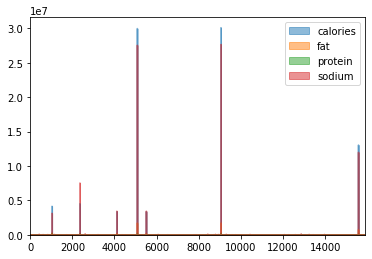

In [2]:
df_nutrients = df.drop(['title', 'categories', 'ingredients', 'date', 'rating'], axis=1).astype(float)
plt.figure()
df_nutrients.plot.area(stacked=False)
plt.show()

## Ao verificar os valores de calorias dos pratos, vemos um gráfico que mostra a presença de outliers. Através de uma rápida pesquisa, pude perceber que são raros os pratos que contém 3000 calorias, então decidi desconsiderar as instâncias que contenham valores maiores que este.

<Figure size 432x288 with 0 Axes>

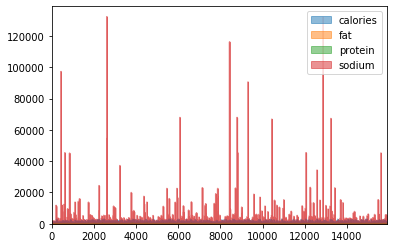

In [3]:
df = df.drop(df[df.calories > 3000].index)
df_nutrients = df.drop(['title', 'categories', 'ingredients', 'date', 'rating'], axis=1).astype(float)
plt.figure()
df_nutrients.plot.area(stacked=False)
plt.show()

## Há instâncias em que a quantidade de sódio é irreal. Portanto, ainda é necessário remover estas instâncias.

<Figure size 432x288 with 0 Axes>

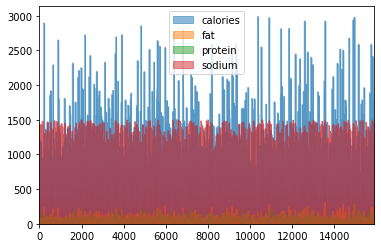

In [4]:
df = df.drop(df[df.sodium > 1500].index)
df_nutrients = df.drop(['title', 'categories', 'ingredients', 'date', 'rating'], axis=1).astype(float)
plt.figure()
df_nutrients.plot.area(stacked=False)
plt.show()

## As informações nutricionais parecem estar bem selecionadas, o que me faz pensar que as instâncias que continuam no dataset tendem a gerar análises corretas. Por último, vamos verificar se o rating dos usuários não contém outliers.

<Figure size 432x288 with 0 Axes>

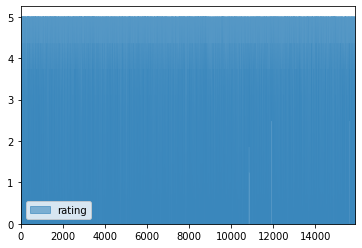

In [5]:
df_ratings = df.drop(['title', 'categories', 'ingredients', 'date', 'calories', 'protein', 'fat', 'sodium'], axis=1).astype(float)
plt.figure()
df_ratings.plot.area(stacked=False)
plt.show()

## Com os dados tratados, é possível começar a responder o problema 1: "a que categorias pertencem as comidas mais calóricas"? Para tal, inicialmente vamos gerar uma lista das categorias existentes no dataset.

In [6]:
data = df.to_numpy()

categories_unique = []
for i in range(len(data)):
    categories_unique.append(data[i, 1])
categories_unique = [item for sublist in categories_unique for item in sublist]
categories_unique = set(categories_unique)

## Agora, vamos fazer uma verificação das categorias que aparecem mais frequentemente nas 1500 receitas mais calóricas.

In [7]:
data_cal_sorted = df.sort_values(by='calories', ascending=False).to_numpy()

categories_count = dict.fromkeys(categories_unique, 0)
for categ in categories_unique:
    for i in range(1500):
        if categ in data_cal_sorted[i, 1]:
            categories_count[categ] += 1
dict(Counter(categories_count).most_common(20))

{'Bon Appétit': 815,
 'Peanut Free': 565,
 'Soy Free': 550,
 'Gourmet': 476,
 'Tree Nut Free': 448,
 'Bake': 361,
 'Winter': 350,
 'Dinner': 345,
 'Kosher': 342,
 'Fall': 298,
 'Chicken': 285,
 'Quick & Easy': 282,
 'Vegetarian': 277,
 'Roast': 273,
 'Dessert': 262,
 'Pescatarian': 261,
 'Summer': 249,
 'Wheat/Gluten-Free': 245,
 'Onion': 229,
 'Sauté': 224}

## Para ter uma outra abordagem das categorias mais calórias, decidi refazer a contagem levando o número de calorias como um peso, podendo gerar uma lista diferente e, talvez, mais precisa. Portanto, se uma determinada receita, que está na categoria "Dinner" tem 500 cal, a categoria receberá 500 pontos. O intuito é dar uma maior importância na contagem das categorias às receitas com maior número de calorias, utilizando o dataset intero, e não somente o top 1500.

In [8]:
categories_weight = dict.fromkeys(categories_unique, 0)
for categ in categories_unique:
    for i in range(len(data)):
        if categ in data[i, 1]:
            count = data[i, 4]
            categories_weight[categ] += count  
dict(Counter(categories_weight).most_common(20))

{'Bon Appétit': 2788622.0,
 'Peanut Free': 2287440.0,
 'Soy Free': 2231689.0,
 'Tree Nut Free': 1837634.0,
 'Gourmet': 1795494.0,
 'Vegetarian': 1637604.0,
 'Kosher': 1598825.0,
 'Pescatarian': 1490020.0,
 'Bake': 1416811.0,
 'Quick & Easy': 1276797.0,
 'Wheat/Gluten-Free': 1149112.0,
 'Dessert': 1086946.0,
 'Summer': 1073386.0,
 'Winter': 1040996.0,
 'Fall': 961280.0,
 'Dinner': 864802.0,
 'No Sugar Added': 744882.0,
 'Dairy Free': 715352.0,
 'Sauté': 694944.0,
 'Milk/Cream': 665270.0}

## Os dois resultados são um pouco diferentes, mas, por dar uma importância maior às receitas mais calóricas pelo sistema de pontos, eu acredito que a segunda abordagem seja mais correta.

## Vamos agora começar a responder o problema 2: "quais os top 10 ingredientes contidos nas receitas mais calóricas"? Esta questão não é tão simples porque os ingredientes consistem em diversas frases complexas, em que há muitas palavras pouco importantes e apenas uma palavra importante por frase. Por isso, vamos começar fazendo um tratamento simples para vermos as palavras mais frequentes nos ingredientes.

In [9]:
df2 = df.drop(
    [
        'title',
        'categories',
        'date',
        'fat',
        'protein',
        'sodium',
        'rating'
    ],
    axis=1
)
data2 = df2.to_numpy()
data2_cal_sort = df2.sort_values(by='calories', ascending=False).to_numpy()
df2

,ingredients,calories
0,"[4 cups low-sodium vegetable or chicken stock,...",426
1,"[1 1/2 cups whipping cream, 2 medium onions, c...",403
2,"[1 fennel bulb (sometimes called anise), stalk...",165
3,"[1 12-ounce package frozen spinach soufflé, th...",547
4,[2 1/2 cups (lightly packed) fresh basil leave...,948
5,"[1/4 cup soy sauce, 1 tablespoon sugar, 2 teas...",170
7,"[4 teaspoons olive oil, 1/2 cup finely chopped...",256
8,"[Nonstick vegetable oil spray, 3 cups all-purp...",766
9,[4 6- to 7-ounce beef tenderloin steaks (each ...,174
10,"[1 large ripe peach, 2 tablespoons sugar, 1 te...",134


## Agora, vamos fazer a contagem de palavras, eliminando algumas informações que não são úteis para o problema:

In [10]:
ingredients_unique = []
bad_substrings = ['/', 'cup', 'spoon', '1/2', '1/4', '3/4', ',', '(', ')']
for i in range(1500):
    for j in range(len(data2_cal_sort[i, 0])):
        phrase = data2_cal_sort[i, 0][j].split()
        for k in range(len(phrase)):
            try:
                word = phrase[k]
                float(word)
                continue
            except ValueError:
                valid_word = True
                for l in bad_substrings:
                    if l in word:
                        valid_word = False
                        break
                if valid_word:
                    ingredients_unique.append(word)

ingredients_count = dict(Counter(ingredients_unique).most_common(40))
pd.DataFrame.from_dict(ingredients_count, orient='index').rename(columns={0: 'count'})

,count
chopped,2000
fresh,1795
large,1176
or,1172
oil,1141
and,973
into,912
cut,883
ground,796
salt,787


In [11]:
ingredients_unique = []
bad_substrings = ['/', 'cup', 'spoon', '1/2', '1/4', '3/4', ',', '(', ')']
for i in range(len(data2)):
    for j in range(len(data2[i, 0])):
        phrase = data2[i, 0][j].split()
        for k in range(len(phrase)):
            try:
                word = phrase[k]
                float(word)
                continue
            except ValueError:
                valid_word = True
                for l in bad_substrings:
                    if l in word:
                        valid_word = False
                        break
                if valid_word:
                    ingredients_unique.append([word] * int(data2[i, 1]))
                    
ingredients_unique = [item for sublist in ingredients_unique for item in sublist]
ingredients_weight = dict(Counter(ingredients_unique).most_common(40))
pd.DataFrame.from_dict(ingredients_weight, orient='index').rename(columns={0: 'weighted score'})

,weighted score
chopped,6203970
fresh,5590611
or,3701274
large,3529486
oil,3272353
and,3036361
into,2751384
cut,2677372
sugar,2641412
salt,2560866


## A partir da lista é possível analisar as palavras mais comuns contidas nos ingredientes. Unindo isso ao fato de que estão sendo analisadas refeições com alto índice calórico e fazendo uma análise com peso de acordo com o número de calorias presente, é possível associar ingredientes nas listas aos pratos mais calóricos.

## Para o exercício 3, é preciso levar em consideração as outras informações nutricionais dos pratos, como gordura, proteínas e sódio. Aqui, estaremos levando em consideração também a nota dada pelos usuários do site, buscando ofertar algo que tenha uma aprovação pública minimamente decente.

In [12]:
df3 = df.astype({'calories': float, 'fat': float, 'sodium': float, 'protein': float, 'rating': float})
df3 = df3.drop(['categories', 'ingredients'], axis=1)
df3 = df3.sort_values(by=['calories', 'sodium', 'fat', 'protein', 'rating'], ascending=[True, True, True, False, False])
df3


,title,date,calories,fat,protein,sodium,rating
3883,To Clarify Butter,2004-08-20,0.0,0.0,0.0,0.0,5.000
7367,Spritz Wreaths,2004-08-20,0.0,0.0,0.0,1.0,2.500
4860,Dashi (Japanese Sea Stock),2004-08-20,0.0,0.0,0.0,26.0,5.000
5833,Garlic Broth,2004-08-20,1.0,0.0,0.0,9.0,3.750
4408,Chicken Giblet Stock,2004-08-20,1.0,0.0,0.0,25.0,0.000
12013,Fresh Vegetable Platter with Olive Oil Dip,2004-08-20,1.0,0.0,0.0,42.0,3.750
881,Szechuan Salt-Pepper,2004-08-20,2.0,0.0,0.0,5.0,3.125
1542,Vegetable-Herb Broth,2004-08-20,2.0,0.0,0.0,17.0,0.000
595,Turkey Giblet Stock,2005-10-21,2.0,0.0,0.0,27.0,3.750
4265,Wakame,2012-12-11,2.0,0.0,0.0,31.0,5.000


## A primeira recomendação que eu vou fazer é relacionada uma alimentação saudável voltada para o emagrecimento, isto é: um alimento que contenha alta quantidade de proteínas e baixa quantidade de calorias, sódio e gordura.

In [13]:
df3_score = df3.eval('score = rating * (protein / (calories + fat + sodium))')
df3_score.sort_values(by='score', ascending=False)

# cal = data_prob3[:, 1]
# cal_mean = np.mean(cal)
# fat = data_prob3[:, 2]
# fat_mean = np.mean(fat)
# protein = data_prob3[:, 3]
# protein_mean = np.mean(protein)
# sodium = data_prob3[:, 4]
# sodium_mean = np.mean(sodium)
# rating = data_prob3[:, 5]
# rating_mean = np.mean(rating)
# health_score = (rating / rating_mean + protein / protein_mean) - (cal / cal_mean + fat / fat_mean + sodium / sodium_mean)
# data_prob3_mod = np.concatenate((data_prob3, health_score.reshape((len(health_score), 1))), axis=1)
# df31 = pd.DataFrame(data_prob3_mod)
# df31.sort_values(by=6, ascending=False)

,title,date,calories,fat,protein,sodium,rating,score
4732,Grilled Striped Bass,2004-08-20,412.0,10.0,75.0,293.0,5.000,0.524476
7320,Chicken with Sun-Dried Tomato Cream Sauce,2004-08-20,930.0,27.0,155.0,380.0,4.375,0.507199
1998,Achiote Chicken with Tangerine Sauce,2006-04-01,362.0,10.0,54.0,109.0,4.375,0.491164
4829,Giblet Stock,2004-08-20,127.0,3.0,22.0,95.0,5.000,0.488889
351,Grilled Lemon Pepper Chicken Breasts with Thym...,2004-08-20,782.0,31.0,115.0,231.0,4.375,0.481920
15478,Tuna with Tomato-Basil Sauce,2004-08-20,198.0,5.0,29.0,64.0,4.375,0.475187
3392,Roasted Monkfish with Fennel-Saffron Compote,2004-08-20,247.0,12.0,32.0,40.0,4.375,0.468227
9616,Roast Turkey with Herb Butter and Caramelized-...,2004-08-20,839.0,27.0,129.0,521.0,5.000,0.465032
1532,Indian-Style Chicken with Ginger and Curry,2004-08-20,376.0,14.0,54.0,121.0,4.375,0.462329
3890,Korean-Style Tuna Tartare,2004-08-20,213.0,8.0,28.0,83.0,5.000,0.460526


## Agora vamos recomendar um alimento de acordo com a avaliação dos usuários:

In [14]:
# df3.sort_values(by=['rating', 'protein'], ascending=False)

In [15]:
# x = df3.drop('title', axis=1).astype(float).groupby(['rating']).mean()
# x

## Para resolver o problema 4, vamos analisar mais dados para descobrir correlações entre eles e perceber se existe algum fator determinante na alta nota de uma receita, dada por um usuário.

In [16]:
df4 = df.astype({'calories': float, 'fat': float, 'sodium': float, 'protein': float, 'rating': float})
df4 = df4.drop(['title', 'categories', 'ingredients'], axis=1)
df4
data4 = df4.to_numpy()
for i in range(len(data4)):
    data4[i, 0] = datetime.strptime(data4[i, 0], '%Y-%m-%d').date().toordinal()
df4 = pd.DataFrame(data4)
df4 = df4.rename(columns={
    0: 'date_ordinal',
    1: 'calories',
    2: 'fat',
    3: 'protein',
    4: 'sodium',
    5: 'rating'
})
df4 = df4.astype({'calories': float, 'fat': float, 'sodium': float, 'protein': float, 'rating': float})

<Figure size 432x288 with 0 Axes>

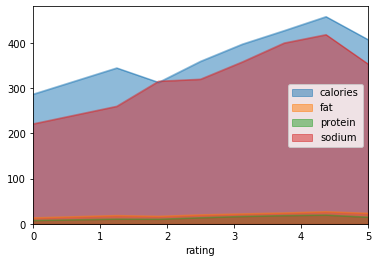

In [17]:
# df4_cal = df4
df4 = df4.groupby(by=['rating']).mean()
plt.figure()
df4.plot.area(stacked=False)
plt.show()

## É perceptível que as notas dos usuários crescem com o aumento de cada nutriente, seja ele saudável ou não. Isto é de certa forma esperado já que o gosto é um atributo subjetivo e tende a se avaliar alimentos que não são tão saudáveis em geral como deliciosos. Vamos plotar os gráficos separadamente de cada nutriente, especialmente no caso da gordura e da proteína, que não fica tão claro no gráfico geral.

<Figure size 432x288 with 0 Axes>

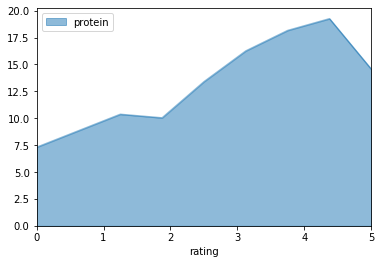

In [18]:
plt.figure()
df4.plot.area(y='protein', stacked=False)
plt.show()

<Figure size 432x288 with 0 Axes>

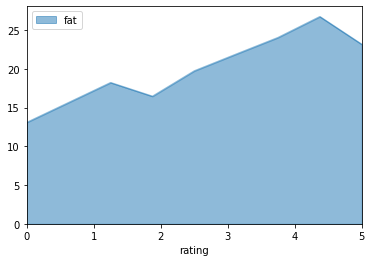

In [19]:
plt.figure()
df4.plot.area(y='fat', stacked=False)
plt.show()

<Figure size 432x288 with 0 Axes>

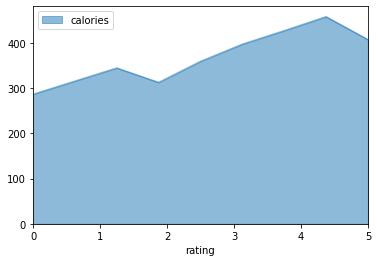

In [20]:
plt.figure()
df4.plot.area(y='calories', stacked=False)
plt.show()

<Figure size 432x288 with 0 Axes>

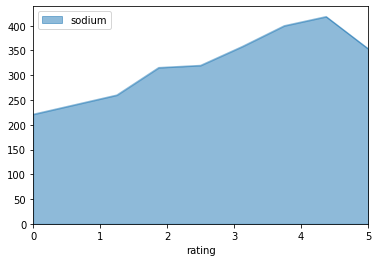

In [21]:
plt.figure()
df4.plot.area(y='sodium', stacked=False)
plt.show()

## Para resolver o exercício 5, vamos gerar novas features no dataset a partir das categorias. Isto é: vamos introduzir as categorias como novas colunas e o valor atribuído a elas será binário, a depender da instância estar na categoria ou não.

In [22]:
df5 = df
data5 = df5.to_numpy()
data5_extra = np.zeros((data5.shape[0], data5.shape[1] + len(categories_unique)), dtype='object')
data5_extra[:, :data5.shape[1]] = data5
# categories_unique5 = list(categories_unique)
categories_unique5 = OrderedDict(sorted(dict.fromkeys(categories_unique, 0).items()))

count = data5.shape[1]
for i in list(categories_unique5.keys()):
    categories_unique5[i] += count
    count += 1
    
for i in range(len(data5_extra)):
    for cat in data5_extra[i, 1]:
        col = categories_unique5[cat]
        data5_extra[i, col] = 1

categories_unique5_inv = {y:x for x,y in categories_unique5.items()}
categories_unique5_inv[0] = 'title'
categories_unique5_inv[1] = 'categories'
categories_unique5_inv[2] = 'ingredients'
categories_unique5_inv[3] = 'date'
categories_unique5_inv[4] = 'calories'
categories_unique5_inv[5] = 'fat'
categories_unique5_inv[6] = 'protein'
categories_unique5_inv[7] = 'sodium'
categories_unique5_inv[8] = 'rating'

df5 = pd.DataFrame(data5_extra).rename(columns=categories_unique5_inv)
df5_top100 = df5.sort_values(by='rating', ascending=False).reset_index(drop=True).drop(index=list(range(100, len(df5))))
df5_top100



,title,categories,ingredients,date,calories,fat,protein,sodium,rating,#CAKEWEEK,...,Yellow Squash,Yogurt,Yonkers,Yuca,Zucchini,cookbooks,leftovers,snack,snack week,turkey
0,Lemon-Spice Bread Pudding with Sauteed Peaches,"[Citrus, Dairy, Egg, Dessert, Bake, Quick & Ea...",[6 cups 1-inch bread cubes from day-old rustic...,2006-08-31,1513,95,13,1322,5,0,...,0,0,0,0,0,0,0,0,0,0
1,Minted Mai Tai,"[Fruit Juice, Rum, Alcoholic, Cocktail, Lime, ...","[1/2 cup fresh lime juice, 1/2 cup almond syru...",2004-08-20,281,0,1,9,5,0,...,0,0,0,0,0,0,0,0,0,0
2,Seafood Canapes with Lemon-Chive Butter,"[Mixer, Fish, Marinate, Cocktail Party, Oscars...","[1/4 pound marinated herring, rinsed, drained,...",2004-08-20,50,2,2,84,5,0,...,0,0,0,0,0,0,0,0,0,0
3,Ricotta Gelato with Blackberry Sauce,"[Liqueur, Milk/Cream, Ice Cream Machine, Fruit...","[1 1/4 cups half-and-half, 1 1/4 cups milk, a ...",2004-08-20,501,18,13,113,5,0,...,0,0,0,0,0,0,0,0,0,0
4,Moroccan-Style Preserved Lemons,"[Citrus, Gourmet]","[6 lemons, 2/3 cup kosher salt, 1 to 1 1/2 cup...",2007-04-18,8,1,0,1254,5,0,...,0,0,0,0,0,0,0,0,0,0
5,Plum Almond Tartlets,"[Food Processor, Dessert, Bake, Plum, Almond, ...","[1 1/4 cups all-purpose flour, 1/4 teaspoon sa...",2007-07-16,562,28,7,162,5,0,...,0,0,0,0,0,0,0,0,0,0
6,Sesame-and-Soy Watermelon Poké,"[Bon Appétit, Watermelon, Side, Salad, Vinegar...","[3 pounds seedless watermelon, rind removed, c...",2016-07-01,201,12,3,452,5,0,...,0,0,0,0,0,0,0,0,0,0
7,Capucine,"[Coffee, Milk/Cream, Non-Alcoholic, Breakfast,...","[1/2 cup sugar, 1/2 vanilla bean, split length...",2004-08-20,187,9,1,26,5,0,...,0,0,0,0,0,0,0,0,0,0
8,Aunt Tom's Italian Cream Cake,"[Cake, Mixer, Egg, Dessert, Bake, Cream Cheese...","[2 cups granulated sugar, 1 1/2 cups vegetable...",2004-08-20,377,24,3,201,5,0,...,0,0,0,0,0,0,0,0,0,0
9,White Zinfandel Sangria,"[Fruit Juice, Liqueur, Wine, Alcoholic, Lemon,...","[1 750-ml bottle of chilled White Zinfandel, 1...",2004-08-20,65,0,1,11,5,0,...,0,0,0,0,0,0,0,0,0,0


## A partir daqui, só é necessário gerar uma lista das categorias que definem as 100 receitas mais bem avaliadas e, depois, contabilizar quantas receitas há para cada uma das categorias listadas.

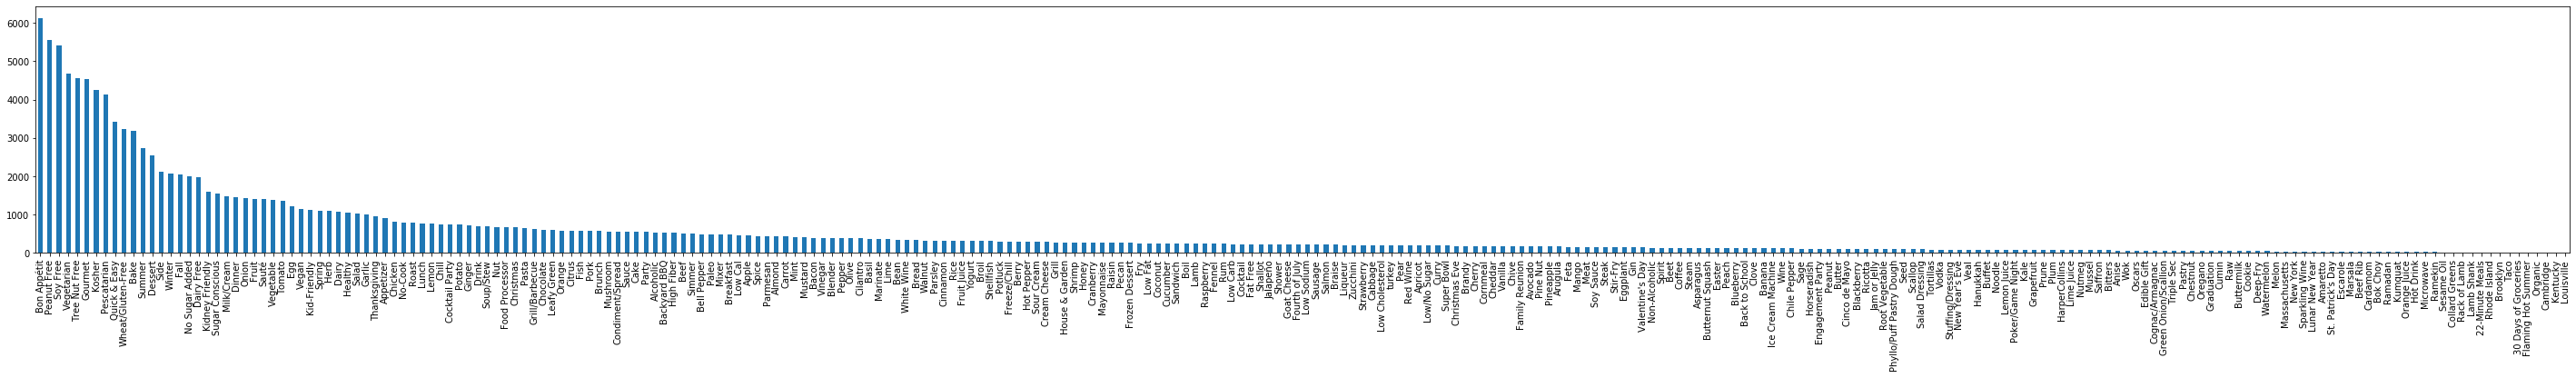

In [29]:
data5_final = df5_top100.to_numpy()
categories_unique5_count = OrderedDict(sorted(dict.fromkeys(categories_unique, 0).items()))

saved_cols = []
for i in range(len(data5_final)):
    for j in range(9, data5_final.shape[1]):
        if data5_final[i, j] == 1:
            col_name = categories_unique5_inv[j]
            saved_cols.append(col_name)
            categories_unique5_count[col_name] += 1

saved_cols = list(set(saved_cols))
# for k,v in categories_unique5_count.items():
#     if v == 0:
#        del categories_unique5_count[k]
cat5_count = {k:v for k,v in categories_unique5_count.items() if v != 0}

plt.figure()
df5[saved_cols].sum().sort_values(ascending=False).plot.bar(figsize=(50, 5))
plt.show()